# (30) Revsions -- Membership dist (proportion plot)

**Motivation**: Nat. Comm. revision work. This one is membership distribution plot with different binning. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
fig_dir = pjoin(fig_base_dir, 'rebuttal')
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Prepare (512)

In [3]:
mice = Mice(nn)

## Results (K = 7)

In [4]:
%%time

results = proportion_results(
    mice=mice,
    merge_thres=0.372,
    n_resamples=int(1e2),
    global_order=('infer', False),
    bin_edges=(0.2, 1),
    n_cuts=4,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 1min 51s, sys: 12.5 s, total: 2min 4s
Wall time: 2min 3s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

## OCs

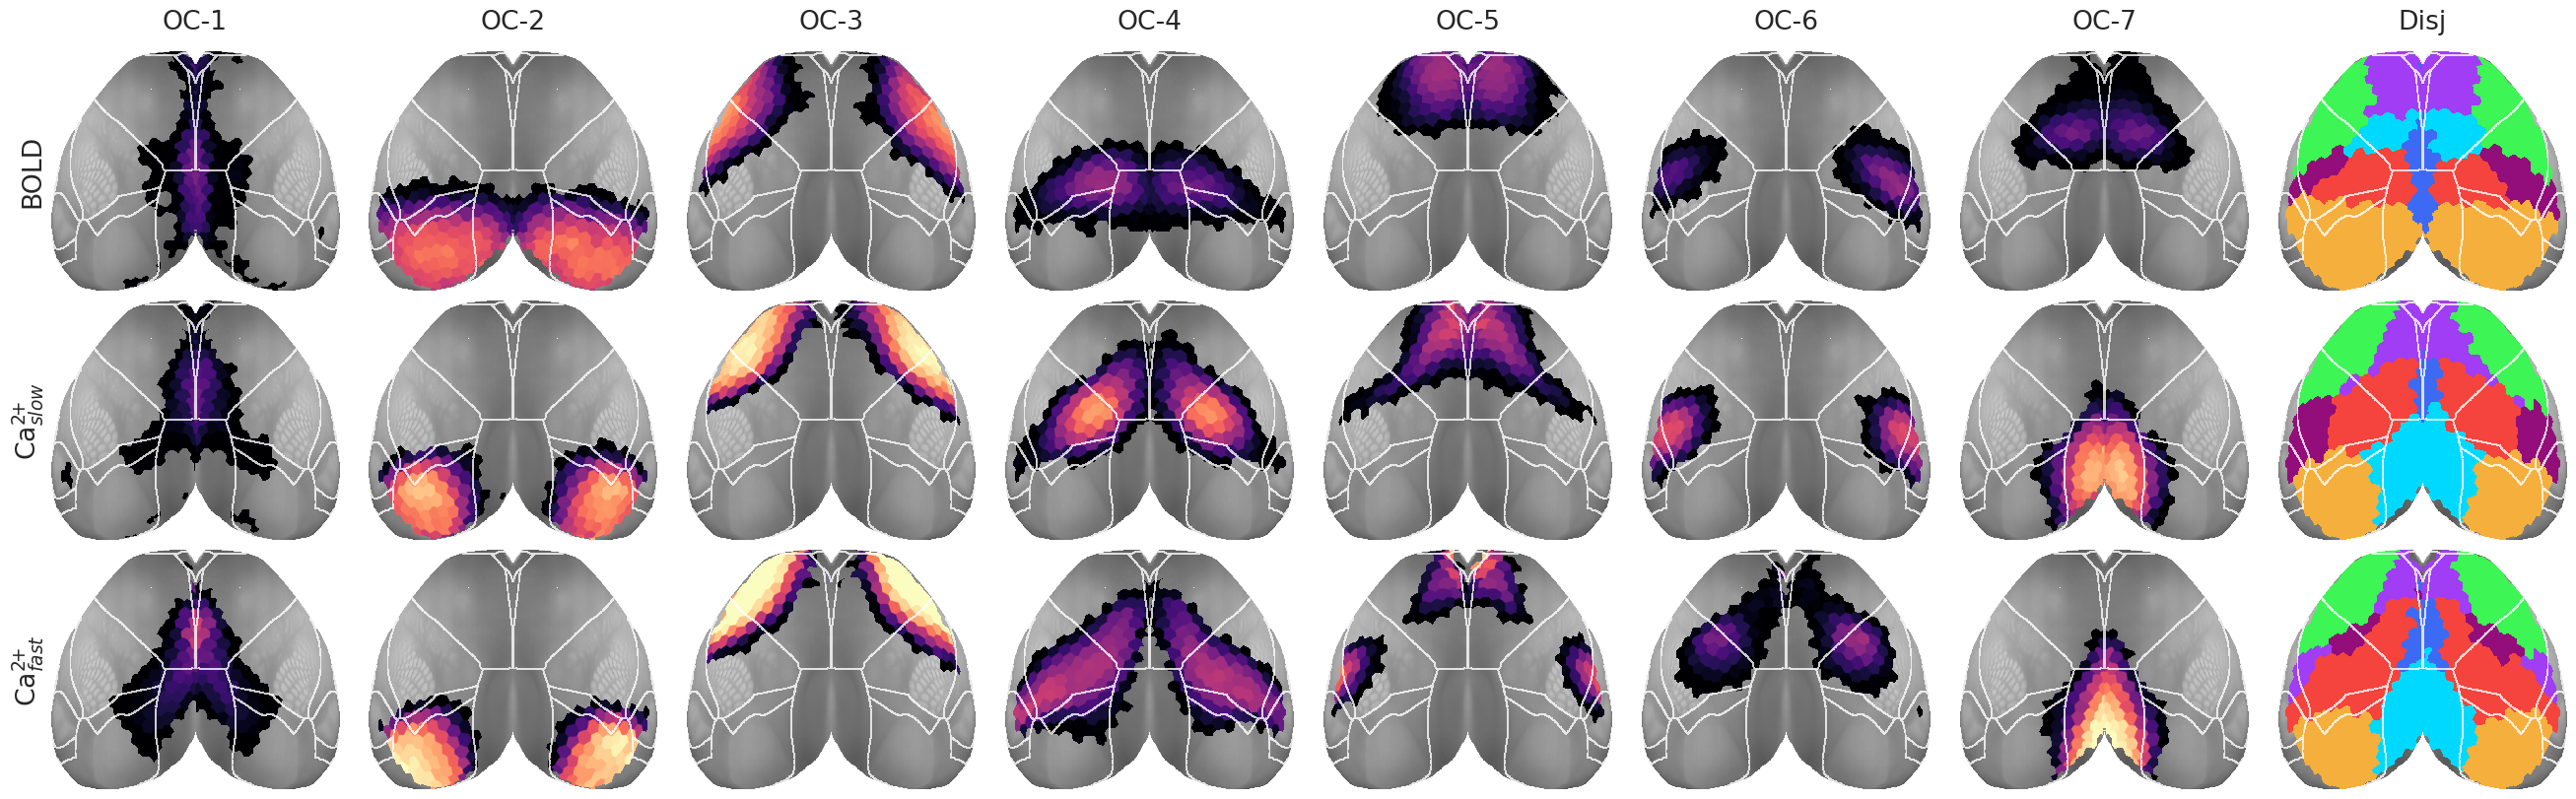

In [5]:
_ = bt.show(
    data=results['pi_sorted'],
    **show_kws(7),
)

## Propotion plot

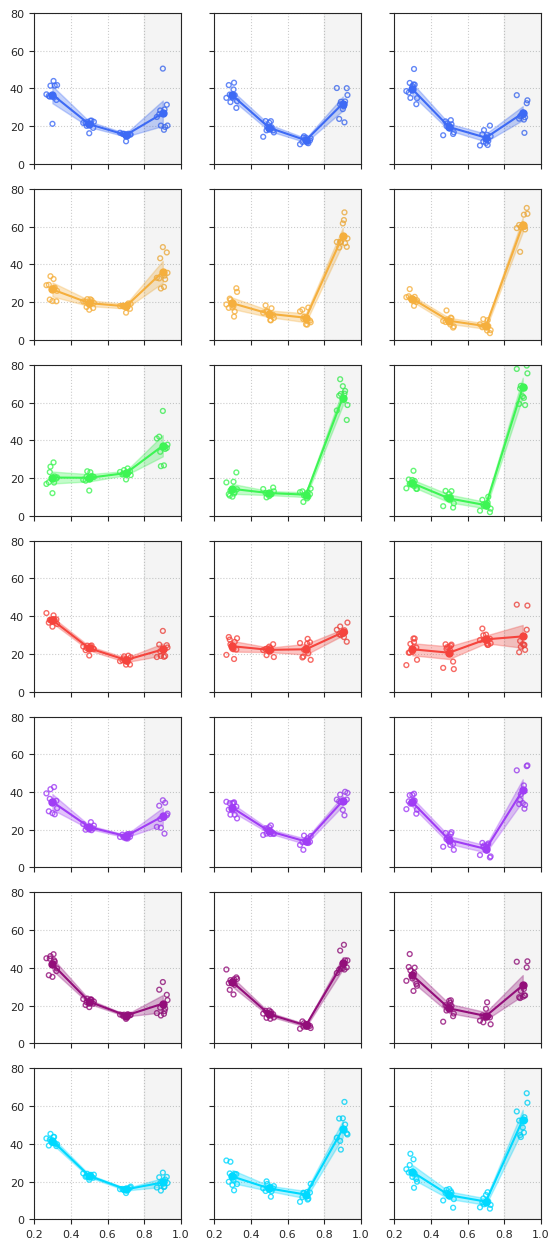

In [6]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'])

## Different bins

In [7]:
%%time

results = proportion_results(
    mice=mice,
    merge_thres=0.372,
    n_resamples=int(1e5),
    global_order=('infer', False),
    bin_edges=(0.0, 1),
    n_cuts=5,
)

CPU times: user 52min 53s, sys: 26 s, total: 53min 19s
Wall time: 53min 18s


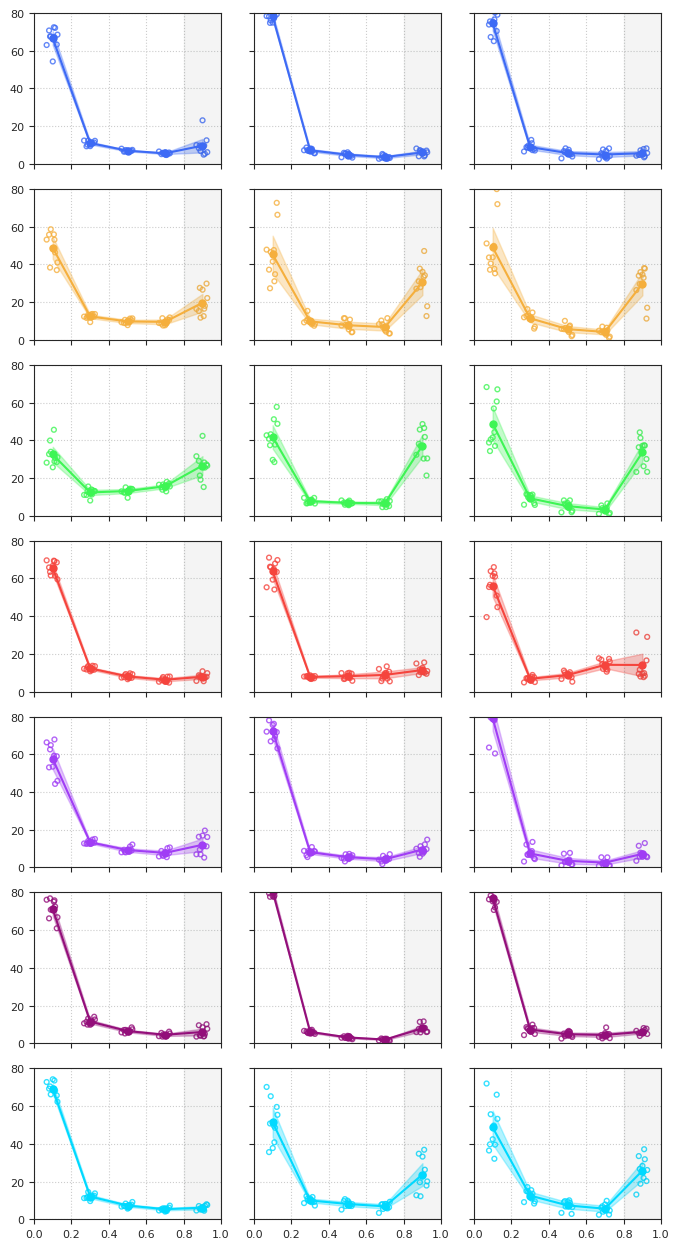

In [8]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'], figsize_x=2.3)
fig.savefig(pjoin(fig_dir, 'prop_full.pdf'), **kws_fig)